# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
income = pd.read_csv('data/Median Household Income.csv')

In [3]:
income.head()

,ID Year,Year,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,Slug Geography
0,2019,2019,62843,135.0,United States,01000US,united-states
1,2019,2019,57144,216.0,Michigan,04000US26,michigan
2,2019,2019,72586,1463.0,"Washtenaw County, MI",05000US26161,washtenaw-county-mi
3,2019,2019,72586,1463.0,"Ann Arbor, MI",31000US11460,ann-arbor-mi-31000US11460
4,2019,2019,94064,2436.0,"Washtenaw County (West, Northeast & Southeast)...",79500US2602701,washtenaw-county-west-northeast-southeast-puma-mi


In [4]:
wage = pd.read_csv('data/Wage Distribution.csv')

In [5]:
wage.head()

,ID Wage Bin,Wage Bin,ID Year,Year,ID Workforce Status,Workforce Status,Total Population,Total Population MOE Appx,Record Count,Geography,ID Geography,Slug Geography,share
0,1,< $10K,2019,2019,True,True,17042451,95317.601983,835057,United States,01000US,united-states,0.115568
1,2,$10-20k,2019,2019,True,True,18892384,99643.372506,848357,United States,01000US,united-states,0.128112
2,3,$20-30k,2019,2019,True,True,20640639,103441.250408,911251,United States,01000US,united-states,0.139967
3,4,$30-40k,2019,2019,True,True,19166321,100256.208298,875269,United States,01000US,united-states,0.129970
4,5,$40-50k,2019,2019,True,True,15446173,91297.539461,731539,United States,01000US,united-states,0.104743


# Inspect the data

## Median Income

In [6]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Year                       49 non-null     int64  
 1   Year                          49 non-null     int64  
 2   Household Income by Race      49 non-null     int64  
 3   Household Income by Race Moe  49 non-null     float64
 4   Geography                     49 non-null     object 
 5   ID Geography                  49 non-null     object 
 6   Slug Geography                49 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.8+ KB


In [7]:
income.nunique()

ID Year                          7
Year                             7
Household Income by Race        41
Household Income by Race Moe    42
Geography                        7
ID Geography                     7
Slug Geography                   7
dtype: int64

In [8]:
income.drop(
    columns=['ID Year', 'Household Income by Race Moe', 'Slug Geography'], 
    inplace=True
)

In [9]:
income.head()

,Year,Household Income by Race,Geography,ID Geography
0,2019,62843,United States,01000US
1,2019,57144,Michigan,04000US26
2,2019,72586,"Washtenaw County, MI",05000US26161
3,2019,72586,"Ann Arbor, MI",31000US11460
4,2019,94064,"Washtenaw County (West, Northeast & Southeast)...",79500US2602701


## Wage

In [10]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID Wage Bin                252 non-null    int64  
 1   Wage Bin                   252 non-null    object 
 2   ID Year                    252 non-null    int64  
 3   Year                       252 non-null    int64  
 4   ID Workforce Status        252 non-null    bool   
 5   Workforce Status           252 non-null    bool   
 6   Total Population           252 non-null    int64  
 7   Total Population MOE Appx  252 non-null    float64
 8   Record Count               252 non-null    int64  
 9   Geography                  252 non-null    object 
 10  ID Geography               252 non-null    object 
 11  Slug Geography             126 non-null    object 
 12  share                      252 non-null    float64
dtypes: bool(2), float64(2), int64(5), object(4)
memory

In [11]:
wage.nunique()

ID Wage Bin                   21
Wage Bin                      21
ID Year                        6
Year                           6
ID Workforce Status            1
Workforce Status               1
Total Population             252
Total Population MOE Appx    252
Record Count                 252
Geography                      2
ID Geography                   2
Slug Geography                 1
share                        252
dtype: int64

In [12]:
wage.drop(
    columns=['ID Year', 'ID Workforce Status', 'Workforce Status', 
             'ID Geography', 'Slug Geography', 'ID Wage Bin', 
             'Total Population', 'Total Population MOE Appx',
             'Record Count'], 
    inplace=True
)

In [13]:
wage.head()

,Wage Bin,Year,Geography,share
0,< $10K,2019,United States,0.115568
1,$10-20k,2019,United States,0.128112
2,$20-30k,2019,United States,0.139967
3,$30-40k,2019,United States,0.129970
4,$40-50k,2019,United States,0.104743


In [14]:
wage['Wage Bin'].unique()

array(['< $10K', '$10-20k', '$20-30k', '$30-40k', '$40-50k', '$50-60k',
       '$60-70k', '$70-80k', '$80-90k', '$90-100k', '$100-110k',
       '$110-120k', '$120-130k', '$130-140k', '$140-150k', '$150-160k',
       '$160-170k', '$170-180k', '$180-190k', '$190-200k', '$200k+'],
      dtype=object)

In [15]:
wage_bins = pd.CategoricalDtype(wage['Wage Bin'].unique(), ordered=True)
wage_bins

CategoricalDtype(categories=['< $10K', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
                  '$50-60k', '$60-70k', '$70-80k', '$80-90k', '$90-100k',
                  '$100-110k', '$110-120k', '$120-130k', '$130-140k',
                  '$140-150k', '$150-160k', '$160-170k', '$170-180k',
                  '$180-190k', '$190-200k', '$200k+'],
, ordered=True)

In [16]:
wage['Wage Bin'] = wage['Wage Bin'].astype(wage_bins)

In [17]:
wage.dtypes

Wage Bin     category
Year            int64
Geography      object
share         float64
dtype: object

# Visualize Median Household Income

In [18]:
income.head()

,Year,Household Income by Race,Geography,ID Geography
0,2019,62843,United States,01000US
1,2019,57144,Michigan,04000US26
2,2019,72586,"Washtenaw County, MI",05000US26161
3,2019,72586,"Ann Arbor, MI",31000US11460
4,2019,94064,"Washtenaw County (West, Northeast & Southeast)...",79500US2602701


In [19]:
income.loc[:, ['Geography', 'ID Geography']].nunique()

Geography       7
ID Geography    7
dtype: int64

In [20]:
income['Geography'].unique()

array(['United States', 'Michigan', 'Washtenaw County, MI',
       'Ann Arbor, MI',
       'Washtenaw County (West, Northeast & Southeast) PUMA, MI',
       'Ann Arbor City Area PUMA, MI',
       'Washtenaw County (East Central, Outside Ann Arbor City) PUMA, MI'],
      dtype=object)

In [21]:
income['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013], dtype=int64)

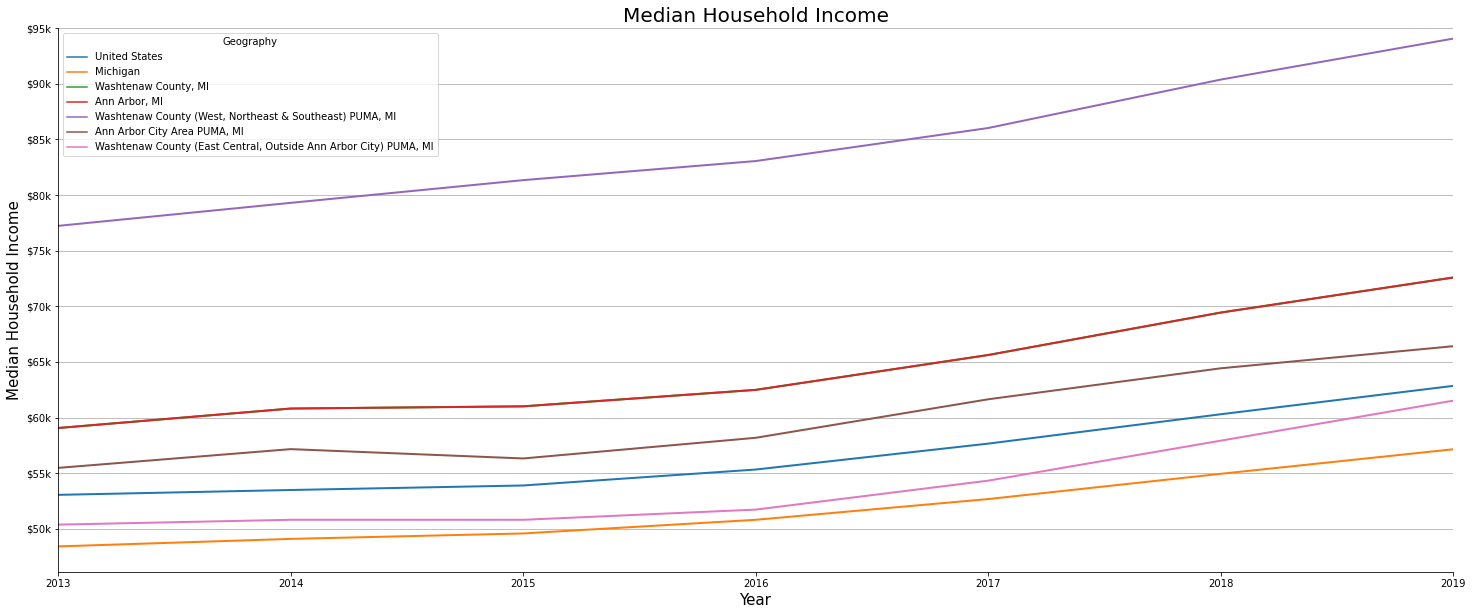

In [22]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=income, x='Year', y='Household Income by Race', hue='Geography', linewidth=2)
plt.xlim(2013, 2019)
plt.ylim(top=95000)
plt.yticks(np.arange(50000, 100000, 5000))
plt.grid(axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Median Household Income', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Median Household Income', fontsize=15)
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'${int(x/1000)}k')

# Wage Distribution

In [23]:
wage.head()

,Wage Bin,Year,Geography,share
0,< $10K,2019,United States,0.115568
1,$10-20k,2019,United States,0.128112
2,$20-30k,2019,United States,0.139967
3,$30-40k,2019,United States,0.129970
4,$40-50k,2019,United States,0.104743


In [24]:
wage['Geography'].unique()

array(['United States', 'Michigan'], dtype=object)

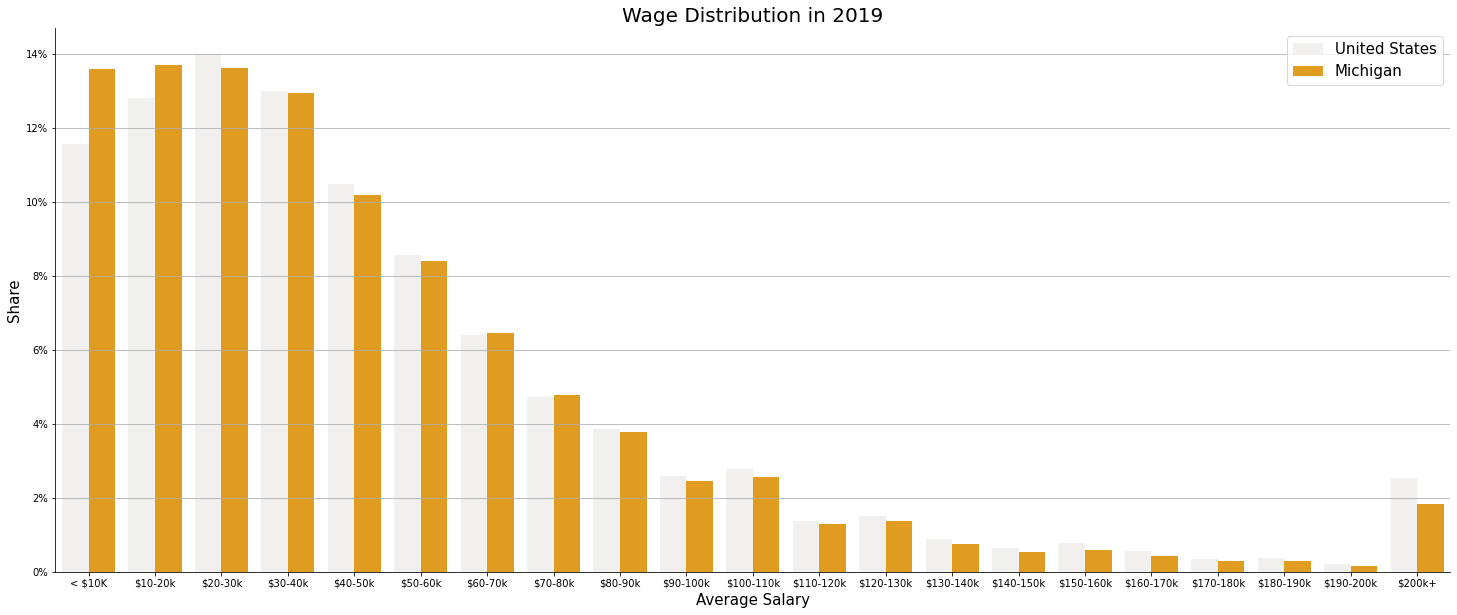

In [25]:
plt.figure(figsize=(25, 10))
sns.barplot(data=wage[wage['Year'] == 2019], x='Wage Bin', y='share', hue='Geography', color='orange')
plt.grid(axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Wage Distribution in 2019', fontsize=20)
plt.xlabel('Average Salary', fontsize=15)
plt.ylabel('Share', fontsize=15)
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'{int(x*100)}%')
plt.legend(prop={'size': 15})